In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys, os, glob, errno
import csv
import json
import h5py

import numpy as np
import blimpy as bl
from astropy import units as u

sys.path.insert(0, "../setigen/")
import setigen as stg

dt = 1.4316557653333333
fch1 = 6095.214842353016
df = 1.3969838619232178

def db_to_snr(db):
    return np.power(10, db / 10)

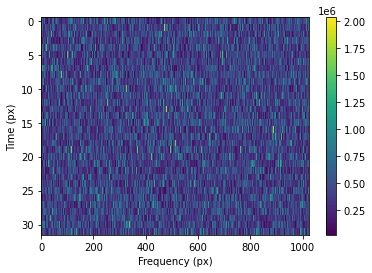

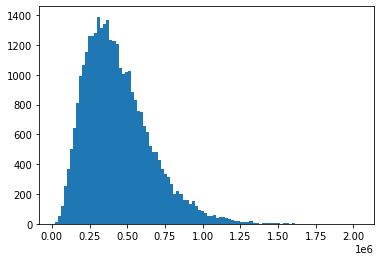

In [48]:
frame = stg.Frame(fchans=1024,
                  tchans=32,
                  df=df*u.Hz,
                  dt=dt*u.s,
                  fch1=fch1*u.MHz)

frame.add_noise_from_obs()

frame.render()
plt.show()

plt.hist(frame.get_data().flatten(), bins=100)
plt.show()

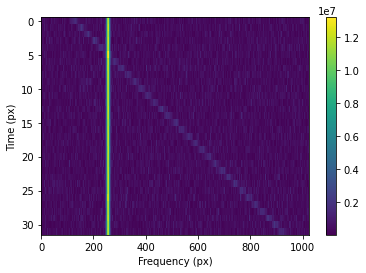

In [53]:
frame = stg.Frame(fchans=1024,
                  tchans=32,
                  df=df*u.Hz,
                  dt=dt*u.s,
                  fch1=fch1*u.MHz)

frame.add_noise_from_obs()

frame.add_constant_signal(f_start=frame.get_frequency(128),
                          drift_rate=25*u.Hz/u.s,
                          level=frame.get_intensity(snr=db_to_snr(15)),
                          width=30*u.Hz,
                          f_profile_type='gaussian')

frame.add_constant_signal(f_start=frame.get_frequency(256),
                          drift_rate=0*u.Hz/u.s,
                          level=frame.get_intensity(snr=db_to_snr(25)),
                          width=15*u.Hz,
                          f_profile_type='gaussian')

# plt.figure(figsize=(8, 5))
frame.render()
plt.show()

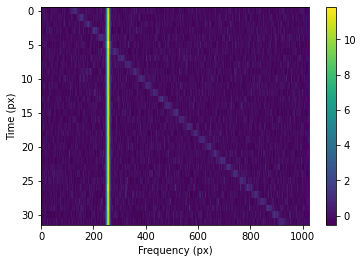

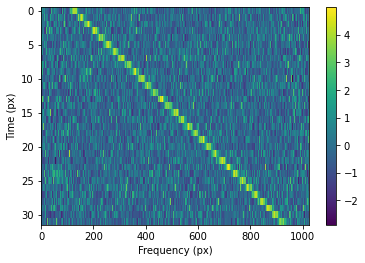

In [54]:
data = frame.get_data()

norm1 = (data - np.mean(data)) / np.std(data)
norm_frame1 = frame.from_data(df, dt, fch1, norm1)
norm_frame1.render()
plt.show()

norm2 = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
norm_frame2 = frame.from_data(df, dt, fch1, norm2)
norm_frame2.render()
plt.show()